# Programming for Data Analysis Assignment

This notebook contains my submission for the project for the Programming for Data Analysis module, Winter 2022.

I have selected to analyse Airbnb listings in Dublin, Ireland. This analysis will focus on rating scores.

Problem Statement:

For this project you must create a data set by simulating a real-world phenomenon of your choosing. You may pick any phenomenon you wish – you might pick one that is of interest to you in your personal or professional life. Then, rather than collect data
related to the phenomenon, you should model and synthesise such data using Python. We suggest you use the numpy.random package for this purpose. Specifically, in this project you should:

* Choose a real-world phenomenon that can be measured and for which you could collect at least one-hundred data points across at least four different variables.
* Investigate the types of variables involved, their likely distributions, and their relationships with each other. * Synthesise/simulate a data set as closely matching their properties as possible.
* Detail your research and implement the simulation in a Jupyter Notebook – the data set itself can simply be displayed in an output cell within the notebook.

Note that this project is about simulation – you must synthesise a data set. Some students may already have some real-world data sets in their own files. It is okay to base your synthesised data set on these should you wish (please reference it if you do), but the main task in this project is to create a synthesised data set. The next section
gives an example project idea.

### Assumptions

We assume that all the data from data sources (Airbnb) is correct in terms of values, addresses and their corresponding location.

Prices of properties are not affected by seasonality.

![Image2](https://www.independent.ie/news/b7e3b/41599548.ece/AUTOCROP/w1240/AIRBNB-IPOFEES%20SPARE)

### Step 1: Import required libraries

In [5]:
# NumPy for numerical operations
import numpy as np

# Pandas for data analysis
import pandas as pd

# seaborn
import seaborn as sns

# random
import random

from scipy.stats import norm

# Statistics for descriptive statistics
import statistics

# Matplotlib.pyplot for plotting
import matplotlib.pyplot as plt

# sklearn
import sklearn.neighbors as nei

from sklearn.neighbors import KNeighborsClassifier

# Dataset URL. Please note that this CSV file is compressed due to its size
url="http://data.insideairbnb.com/ireland/leinster/dublin/2022-09-11/data/listings.csv.gz"

# Importing the CSV file:
listingsDF = pd.read_csv(url, compression="gzip")

In [4]:
# As this is a zipped file, firstly I want to have a quick look and see the size of the data I am dealing with
listingsDF.shape

(7566, 75)

### Step 2: Explore and understand the data and data remediation<br>

In [17]:
listingsDF.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [42]:
# Having an initial look at the data

listingsDF.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,44077,https://www.airbnb.com/rooms/44077,20220911231053,2022-09-12,city scrape,cosy comfortable Irish cottage twin,Our house was built in 1937 when there was ple...,I like our neighbourhood as there is no shorta...,https://a0.muscache.com/pictures/525706/050a3a...,193005,...,4.93,4.66,4.82,NaN,f,2,0,2,0,1.85
1,85156,https://www.airbnb.com/rooms/85156,20220911231053,2022-09-12,city scrape,Cosy Comfortable Irish Cottage 1 Double Bed,Our Cottage is a charming light filled cottage...,"I love Dundrum and its surrounding areas ,<br ...",https://a0.muscache.com/pictures/1749253/9ed2a...,193005,...,4.88,4.64,4.78,NaN,f,2,0,2,0,1.53
2,159889,https://www.airbnb.com/rooms/159889,20220911231053,2022-09-12,city scrape,Friendly Single Room,Washing can be done at a cost of €5 per load....,Plenty of buses into the city and the area is ...,https://a0.muscache.com/pictures/3031697/a8259...,766611,...,4.90,4.63,4.74,NaN,f,3,0,3,0,2.78
3,162809,https://www.airbnb.com/rooms/162809,20220911231053,2022-09-11,city scrape,5.5 miles south of Dublin City :^),A nice place to relax after the bustle of the ...,"Close to the sea, hill walks and the city - vi...",https://a0.muscache.com/pictures/86694529/c07b...,777681,...,4.97,4.77,4.85,NaN,f,2,0,2,0,3.68
4,165828,https://www.airbnb.com/rooms/165828,20220911231053,2022-09-11,city scrape,Pádraig Pearse apt. Kilmainham,"Don't just visit Dublin, experience Dublin in ...","Enjoy a walk along the grand canal, or just ob...",https://a0.muscache.com/pictures/34311419/b3f6...,790601,...,4.75,4.34,4.55,NaN,t,5,5,0,0,0.48


In [43]:
# Continuing to review the csv file

listingsDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7566 entries, 0 to 7565
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            7566 non-null   int64  
 1   listing_url                                   7566 non-null   object 
 2   scrape_id                                     7566 non-null   int64  
 3   last_scraped                                  7566 non-null   object 
 4   source                                        7566 non-null   object 
 5   name                                          7566 non-null   object 
 6   description                                   7411 non-null   object 
 7   neighborhood_overview                         4194 non-null   object 
 8   picture_url                                   7566 non-null   object 
 9   host_id                                       7566 non-null   i

In [ ]:
# Firstly, I want to get rid of any listings that haven't yet been reviewed
listingsDF.dropna(subset=['first_review'], inplace=True)
listingsDF.drop(columns=['first_review'], inplace= True)

In [10]:
# Now I will look for null values in the columns

listingsDF.isnull().mean()[listings.isnull().mean()>0].sort_values(ascending=False)

license                         1.000000
bathrooms                       1.000000
calendar_updated                1.000000
neighbourhood_group_cleansed    1.000000
host_about                      0.503624
host_response_time              0.458206
host_response_rate              0.458206
host_acceptance_rate            0.419391
neighbourhood                   0.406507
neighborhood_overview           0.406507
host_neighbourhood              0.306974
host_location                   0.162184
bedrooms                        0.026896
review_scores_value             0.020937
review_scores_location          0.020615
review_scores_checkin           0.020615
review_scores_accuracy          0.019971
review_scores_communication     0.019971
review_scores_cleanliness       0.019810
description                     0.017233
beds                            0.011435
bathrooms_text                  0.000483
dtype: float64

I have decided that I will be focusing on 5 columns in this project however I also want to keep my original listingsDF as it is in the event I want to do any further analysis on this data contained in it.

On that basis, I have decided to make a new version of the file and call it 'listingsDF2'.

While I have chosen to make a new file, I would have like to demonstrate manipulating my dataset by cleaning it up and dropping irrelevant fields. I would have done this with the code: 

dropcols = ['Column_1', 'Column_2', etc]
listings.drop(columns=dropcols, inplace=True)

In [2]:
# From review of the data, I have decided I will only keep a small number of columns for my analysis and remove the rest.

# Columns that I am keeping: 'host_id', 'host_listings_count', 'reviews_per_month', 'reviews_score_rating', 'price'

listingsDF2 = listingsDF[['host_id','host_listings_count','reviews_per_month','review_scores_rating','price']].copy()

In [29]:
listingsDF2.shape

(7566, 5)

In [30]:
# I want to make sure my new 'listingsDF2' is showing correct info

listingsDF2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7566 entries, 0 to 7565
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   host_id               7566 non-null   int64  
 1   host_listings_count   7566 non-null   int64  
 2   reviews_per_month     6209 non-null   float64
 3   review_scores_rating  6209 non-null   float64
 4   price                 7566 non-null   object 
dtypes: float64(2), int64(2), object(1)
memory usage: 295.7+ KB


In [32]:
# Continuing with reviewing the dataset, I want to check for nulls 
listingsDF2.isnull().mean()[listingsDF2.isnull().mean()>0].sort_values(ascending=False)

reviews_per_month       0.179355
review_scores_rating    0.179355
dtype: float64

In [33]:
# Using DataFrame.describe() method to get my statistical analysis for my listings dataframe

host_id_stats = listingsDF2.loc[:,'host_id']
host_id_stats.describe()

host_id_stats.describe()

count    7.566000e+03
mean     1.165346e+08
std      1.257774e+08
min      4.398400e+04
25%      2.500539e+07
50%      6.773535e+07
75%      1.624988e+08
max      4.787894e+08
Name: host_id, dtype: float64

In [37]:
# Using DataFrame.describe() method to get my statistical analysis for my listings dataframe

host_listings_count_stats = listingsDF2.loc[:,'host_listings_count']
host_listings_count_stats.describe()

host_listings_count_stats.describe()

count    7566.000000
mean       24.575601
std       202.623363
min         1.000000
25%         1.000000
50%         1.000000
75%         3.000000
max      2157.000000
Name: host_listings_count, dtype: float64

In [36]:
# Using DataFrame.describe() method to get my statistical analysis for my listings dataframe

reviews_per_month_stats = listingsDF2.loc[:,'reviews_per_month']
reviews_per_month_stats.describe()

reviews_per_month_stats.describe()

count    6209.000000
mean        1.319006
std         1.988691
min         0.010000
25%         0.130000
50%         0.610000
75%         1.760000
max        44.720000
Name: reviews_per_month, dtype: float64

In [38]:
# Using DataFrame.describe() method to get my statistical analysis for my listings dataframe

review_scores_rating_stats = listingsDF2.loc[:,'review_scores_rating']
review_scores_rating_stats.describe()

review_scores_rating_stats.describe()

count    6209.000000
mean        4.603239
std         0.771441
min         0.000000
25%         4.560000
50%         4.810000
75%         5.000000
max         5.000000
Name: review_scores_rating, dtype: float64

In [39]:
# Using DataFrame.describe() method to get my statistical analysis for my listings dataframe

price_stats = listingsDF2.loc[:,'price']
price_stats.describe()

price_stats.describe()

count        7566
unique        547
top       $100.00
freq          235
Name: price, dtype: object

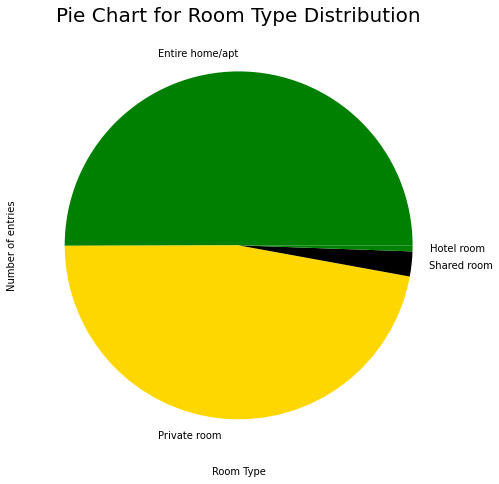

In [63]:
# Reverting back to listingsDF to illustrate some charts

# Pie chart of Room Type

# As I have not yet dropped the columns that I am not interested in, I have taken this opportunity to showcase ability to add graphs and charts
# I am aware this pie chart contains variables that I am not reviewing, it is being used to illustrate my ability to display charts and diagrams.

listingsDF['room_type'].value_counts().plot(kind = 'pie', colors=['green', 'gold', 'black'], figsize = (8, 8))
plt.title('Pie Chart for Room Type Distribution', fontsize = 20)
plt.xlabel('Room Type')
plt.ylabel('Number of entries')
plt.show()

Text(0.5, 1.0, 'Distribution of reviews in the top neighbourhoods')

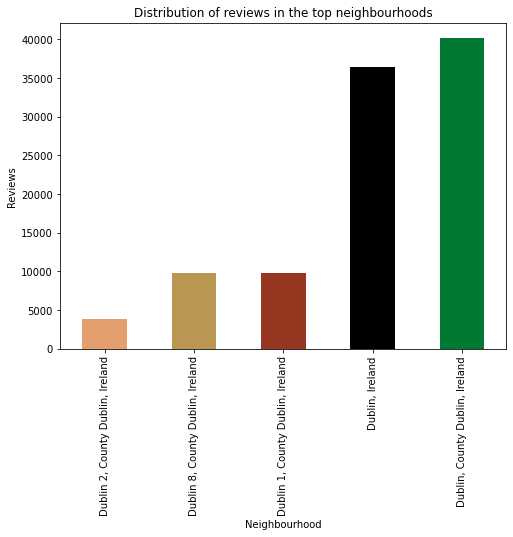

In [65]:
# Again, as per note above, this graph is for illustrative purposes, I thought it would be a nice opportunity to show different areas.

# Distribution of neighbourhoods, unfortunately the csv file did not have a detailed breakdown of locations in Dublin, Ireland,
# however, for illustrative purposes, plot was added.

neighs = listingsDF.groupby('neighbourhood')
reviews = neighs['number_of_reviews'].sum().sort_values().tail(5)

reviews.plot(kind = 'bar', color=['#e59e6d', '#ba9653', '#963821', 'black', '#007a33'], figsize = (8, 6))
plt.xlabel('Neighbourhood')
plt.ylabel('Reviews')
plt.title('Distribution of reviews in the top neighbourhoods')

In [66]:
# As per above, showing my ability to analyse a dataset.

# Distribution of neighbourhoods, unfortunately the csv file did not have a detailed breakdown of locations in Dublin, Ireland,
# however, for illustrative purposes, code was included.

res = listingsDF['neighbourhood'].value_counts()
# We want the most common neighbourhood, thus the head of the list
neig = res.keys().tolist()[0]
# And also the properties it has
n_props = res.tolist()[0]
print("The neighbourhood with the most listings is {} with {} properties".format(neig, n_props))

The neighbourhood with the most listings is Dublin, County Dublin, Ireland with 1127 properties


### Step 3A: Simulating the data and Random Samples - Using numpy.random

#### Chosen variables:
---

* host_idSD (int64)
* host_listings_countSD (int64)
* reviews_per_monthSD (float64)
* review_scores_ratingSD (float64)
* priceSD (object)

In [4]:
# host_idSD

## generate a random array of 100 host id's between 1000 and 9999

host_idSD_array = np.random.randint(low=1000, high=9999, size=100) 
print(host_idSD_array)

[4832 9567 1437 5627 6695 9567 7638 2854 1905 7763 6482 9146 9896 1858
 4934 9532 3838 2948 6005 1990 2990 3618 3514 8324 6675 2593 1735 6135
 9293 4688 5862 5460 3236 1207 8132 7117 4250 4384 3666 5839 8415 9179
 1572 5623 2325 1375 8320 4167 9950 9474 9873 4019 5206 2868 8975 6373
 7422 3816 3698 8924 8126 7754 5412 7112 8956 5753 3825 4885 9389 9257
 2695 7411 4078 1641 1185 7687 7831 1214 1261 3523 3650 7564 2280 8497
 4396 7133 3134 7919 8421 1358 4721 1266 4161 9526 6222 5008 6414 5105
 7158 7701]


In [5]:
# host_listings_countSD

## generate a random array of 100 host listings count between 1 and 50

host_listings_countSD_array = np.random.randint(low=1, high=50, size=100) 
print(host_listings_countSD_array)

[ 1 24 40 39 34 42 33 30 25 47  2 36 44 39 49 22 27 37 43 16 38  4 47 28
  4 15 42  8 29 17  2 31 19 28 38 10 26  8 44  1  3 17 47 28 16 24  1 14
 10  7  1 18 20 14 37 22  5 49 15 49 23 15 24  4 15 28  5 21 16 23 21 24
 16 21 21 41 21 29 16 27 22 28 16 14  7 35 32  6 49 34 42  3  4 49 41  9
  8 48 30 36]


In [6]:
sns.displot(host_listings_countSD, color = 'green')
plt.title('Host Listings Count')
plt.xlabel('No of listings')
plt.show()

NameError: name 'host_listings_countSD' is not defined

In [7]:
# reviews_per_monthSD_array

# create a list of reviews bins

# This datatype I had originally had as a list of options but now I have just amended this to an integer in order to facilitate adding this array to the dataframe.

reviews_per_monthSD_array = np.random.uniform(low=1.0, high=100.0, size=(100,))
print(reviews_per_monthSD_array)

[28.90999125 91.63869162 12.05664536 55.16779464 79.70951994 47.38410793
 66.86350004 98.73199497 45.26778765 89.14144176 70.3417097  81.44002535
 50.90735384 79.62528409 82.4318259  73.41442348  4.47331214 43.57459238
 51.69452545  8.09542916 77.90484389  2.50740698 27.54732564 68.24784807
  7.25170477  2.19010143 40.85355372  6.46446143 50.0300393  40.95735513
 32.92217443 12.97851741 50.0966401  67.50989639 93.22314781 16.4131754
 13.22265056 58.32313453 64.13644487 67.83311692 31.80901748 80.70906141
 29.68239092 69.38926744 51.72345552 75.59022594  9.25609844 76.56793699
 18.81440538 59.75329227 20.31253915 25.67706694 31.21649462 70.05782665
 90.75945942 23.5591141  51.538616   61.48374391 39.38772599 96.17497979
 45.61015362 82.69061135  6.25338174  9.28406807  4.07044998 98.74448536
 98.78825218 48.57769987 34.08276064 11.98229084 96.33673091 74.56078771
 30.92198942 44.420644   40.35169685 75.44915455 27.34597018 96.74106524
 27.09299832 57.09231189 98.90203315 89.85396256 80.

In [8]:
# review_scores_ratingSD_array

review_scores_ratingSD_array = np.random.uniform(low=1.0, high=5.0, size=(100,))
print(review_scores_ratingSD_array)

[1.34200382 1.35943459 3.23538331 2.23773134 2.12781747 1.16387416
 3.50379062 2.4664454  2.18588447 1.04908189 1.51271081 1.79567606
 4.63237204 4.48139212 2.6239525  2.49659169 4.3197566  3.18566919
 2.87668055 4.58887119 1.45205141 2.71555606 4.56783551 1.37249952
 4.2661853  2.43933813 3.67500341 3.55443272 1.51126273 2.18711025
 1.59653892 4.25963723 1.51549208 1.56389786 1.54685191 2.7058539
 2.98654945 2.52626002 2.91930168 3.21685561 3.74643641 4.68137322
 1.89258735 2.41743753 3.82282934 1.7574317  3.31415786 4.99798501
 1.69508808 3.84868629 3.11287282 3.96454208 2.83553233 1.7639484
 1.05523039 2.25299738 1.14048889 3.76808345 4.62536573 1.97602282
 1.71683938 1.59146102 1.42947514 3.71763051 2.03985186 4.64468309
 1.30475296 3.53939855 2.09214927 2.89738741 4.03659263 2.26328665
 3.55140459 2.99148251 1.54333601 2.18792911 4.5762131  1.35288083
 2.09491421 2.04345799 4.44580779 3.59897931 1.61215105 1.741179
 1.45358933 1.49282491 4.29155398 3.04034121 4.36803424 1.83919896

In [9]:
#priceSD_array (object) - Please note, while the datatype for price in listings is 'object', I am going to assume in my new dataset that this is a float.

priceSD_array = np.random.uniform(low=100.0, high=500.0, size=(100,))
print(priceSD_array)

[387.56515957 393.70409422 100.45500121 375.29818972 417.49531147
 403.33113465 128.48525073 110.63351274 356.47376992 146.08031717
 311.95692552 437.20894223 124.43738784 419.81044714 284.82475076
 240.6329669  320.89879586 468.22178674 194.77052916 246.39649887
 445.06950272 373.655016   118.0757889  301.2370581  490.58450498
 281.32020457 327.93112228 372.3017226  466.68450951 383.95654967
 382.53892681 143.79111296 251.81131212 116.86354071 464.23274688
 176.45414357 318.15495884 400.26364213 134.99978429 458.41343709
 469.32623585 446.58928795 396.27735081 469.16716907 476.09789083
 204.00124738 250.15264199 469.74990747 289.95871026 193.76822661
 415.86671722 185.57167518 384.71308088 124.20186664 375.48051543
 148.61627107 103.40855118 225.39464987 464.68120719 431.23561042
 295.86169794 443.60630861 493.03125097 164.25973053 435.03828473
 145.15598261 407.69298793 393.32074964 197.36179192 264.84420411
 130.39251291 469.86883672 158.07449956 134.03963732 311.73929955
 115.88758

So far in Step 3, I have created my 5 variables and simulated the data. I will now create a dataframe for this and name it listingsV3.

In [10]:
# listings V3:

listingsv3 = pd.DataFrame(columns=['host_idSD', 'host_listings_countSD', 'reviews_per_monthSD', 'review_scores_ratingSD', 'priceSD'])

In [11]:
# Adding host_idSD_array to the datafaram listingsv3

listingsv3['host_idSD'] = host_idSD_array

In [12]:
# Adding host_listings_countSD_array to the datafaram listingsv3

listingsv3['host_listings_countSD'] = host_listings_countSD_array

In [13]:
# Adding reviews_per_monthSD_array to the datafaram listingsv3

listingsv3['reviews_per_monthSD'] = reviews_per_monthSD_array

In [14]:
# Adding review_scores_ratingSD_array to the datafaram listingsv3

listingsv3['review_scores_ratingSD'] = review_scores_ratingSD_array

In [15]:
# Adding priceSD_array to the datafaram listingsv3

listingsv3['priceSD'] = priceSD_array

In [16]:
listingsv3.shape

(100, 5)

In [17]:
listingsv3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   host_idSD               100 non-null    int32  
 1   host_listings_countSD   100 non-null    int32  
 2   reviews_per_monthSD     100 non-null    float64
 3   review_scores_ratingSD  100 non-null    float64
 4   priceSD                 100 non-null    float64
dtypes: float64(3), int32(2)
memory usage: 3.2 KB


In [18]:
listingsv3.head()

,host_idSD,host_listings_countSD,reviews_per_monthSD,review_scores_ratingSD,priceSD
0,4832,1,28.909991,1.342004,387.565160
1,9567,24,91.638692,1.359435,393.704094
2,1437,40,12.056645,3.235383,100.455001
3,5627,39,55.167795,2.237731,375.298190
4,6695,34,79.709520,2.127817,417.495311


In [19]:
# numpy.random.seed: Adding this in for illustrative purposes

# setting the seed at 42,

rng = np.random.default_rng(seed=42)

In [20]:
# numpy.random.seed continued

# selecting a set of 15 random numbers

z = rng.random((5,3))

In [21]:
# numpy.random.seed continued

print(z)

[[0.77395605 0.43887844 0.85859792]
 [0.69736803 0.09417735 0.97562235]
 [0.7611397  0.78606431 0.12811363]
 [0.45038594 0.37079802 0.92676499]
 [0.64386512 0.82276161 0.4434142 ]]


In [22]:
# Using DataFrame.describe() method to get my statistical analysis for listingv3 dataframe

host_idSD_stats = listingsv3.loc[:,'host_idSD']
host_idSD_stats.describe()

count     100.000000
mean     5554.350000
std      2677.716581
min      1185.000000
25%      3520.750000
50%      5541.500000
75%      7780.000000
max      9950.000000
Name: host_idSD, dtype: float64

In [23]:
# Using DataFrame.describe() method to get my statistical analysis for listingv3 dataframe

host_listings_countSD_stats = listingsv3.loc[:,'host_listings_countSD']
host_listings_countSD_stats.describe()

count    100.000000
mean      23.900000
std       14.312176
min        1.000000
25%       14.000000
50%       23.000000
75%       36.000000
max       49.000000
Name: host_listings_countSD, dtype: float64

In [24]:
# Using DataFrame.describe() method to get my statistical analysis for listingv3 dataframe

reviews_per_monthSD_stats = listingsv3.loc[:,'reviews_per_monthSD']
reviews_per_monthSD_stats.describe()

count    100.000000
mean      50.652705
std       29.328001
min        1.135423
25%       27.496987
50%       50.063340
75%       75.484422
max       98.902033
Name: reviews_per_monthSD, dtype: float64

In [25]:
# Using DataFrame.describe() method to get my statistical analysis for listingv3 dataframe

review_scores_ratingSD_stats = listingsv3.loc[:,'review_scores_ratingSD']
review_scores_ratingSD_stats.describe()

count    100.000000
mean       2.718538
std        1.144945
min        1.049082
25%        1.611675
50%        2.481519
75%        3.685660
max        4.997985
Name: review_scores_ratingSD, dtype: float64

In [26]:
# Using DataFrame.describe() method to get my statistical analysis for listingv3 dataframe

priceSD_stats = listingsv3.loc[:,'priceSD']
priceSD_stats.describe()

count    100.000000
mean     301.254565
std      126.115013
min      100.455001
25%      184.187734
50%      311.848113
75%      416.273866
max      493.058357
Name: priceSD, dtype: float64

At this point I have my statistical analysis for each variable in the original dataset and have now got the same for my simulated dataset.

### Step 3B: Simulating data and Random Samples - Using Scikit learn

Scikit-learn: A machine learning library that provides almost all the machine learning algorithms you might need. Schikit-learn is designed to be interpolated into NumPy and SciPy.

In [3]:
# Step 1 - Import libraries
from sklearn.datasets import make_classification
import pandas as pd

# Create simulated data
features, output = make_classification(n_samples = 50,
                                       n_features = 5,
                                       n_informative = 5,
                                       n_redundant = 0,
                                       n_classes = 3,
                                       weights = [1, 1, 1])

print("Feature Matrix: ");
# renaming my selected variables with a 'V2' added to name in order to distinguish between my original data and new data
print(pd.DataFrame(features, columns=["host_id_v2", "host_listings_count_v2", "reviews_per_month_v2", "review_score_rating_v2", "price_v2"]).head())

print()
print("Target Class: ");

Feature Matrix: 
   host_id_v2  host_listings_count_v2  reviews_per_month_v2  \
0   -1.904755                0.220892             -0.674106   
1   -0.624866                1.658269              0.865887   
2   -0.220107               -1.040238             -0.093203   
3    0.951059               -0.371344              1.231066   
4   -1.802986                0.414018             -1.886288   

   review_score_rating_v2  price_v2  
0               -0.243172  0.209275  
1               -1.818129 -0.311116  
2                0.591169  1.322630  
3                1.438163  1.260309  
4               -1.063846  1.374012  

Target Class: 


In [3]:
# Draw random samples from a normal (Gaussian) distribution of 'review_scores_rating'

# Parameters:
#               loc : mean (4.603239)
#               scale: standard deviation of the distribution (0.771441)
#               size: integer or tuple, outs shape (none).

rng = np.random.default_rng()
x = rng.random(6209)
print(x)

[0.76105281 0.08706881 0.67200487 ... 0.32221781 0.8719404  0.56074969]


In [5]:
# Normal (Gaussian) distribution of 'review_scores_rating' continued

y = np.random.normal(4.603239, 0.771441,6209)

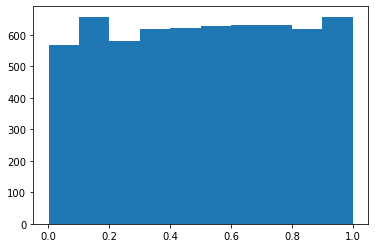

In [4]:
# Normal (Gaussian) distribution of 'review_scores_rating' continued

plt.hist(x)
plt.show()

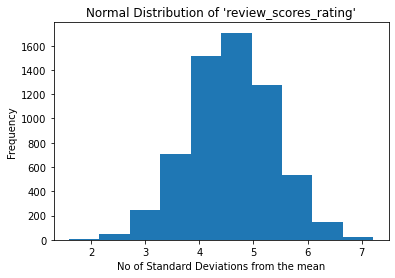

In [10]:
# Normal (Gaussian) distribution of 'review_scores_rating' continued

# plotting histogram with title and labels

plt.title("Normal Distribution of 'review_scores_rating'")
plt.xlabel("No of Standard Deviations from the mean")
plt.ylabel("Frequency")

plt.hist(y)
plt.show()

### Scikit learn: Nearest neighbor

#### Inputs and Outputs
---

In [17]:
# removed 'price', 'review_scores_rating'

inputs = listingsDF[['host_id', 'latitude', 'longitude']]
outputs = listingsDF['id']

#### Classifier
---

In [18]:
# from sklearn.neighbors import KNeighborsClassifier - this has been imported at top of page, also leaving here to demonstrate its use.

knn = nei.KNeighborsClassifier(n_neighbors=4)
#import sklearn.neighbors as nei

#### Fit
---

In [19]:
knn.fit(inputs, outputs)

KNeighborsClassifier(n_neighbors=4)

#### Predict
---

In [20]:
listingsDF.loc[0]

id                                                                           44077
listing_url                                     https://www.airbnb.com/rooms/44077
scrape_id                                                           20220911231053
last_scraped                                                            2022-09-12
source                                                                 city scrape
                                                               ...                
calculated_host_listings_count                                                   2
calculated_host_listings_count_entire_homes                                      0
calculated_host_listings_count_private_rooms                                     2
calculated_host_listings_count_shared_rooms                                      0
reviews_per_month                                                             1.85
Name: 0, Length: 75, dtype: object

In [66]:
# preditings the 'id'

knn.predict([[0.352965,0.872357,1.343674]])

array([2635493], dtype=int64)

Text(0, 0.5, 'Price')

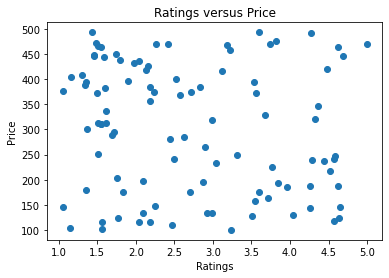

In [34]:
plt.scatter('review_scores_ratingSD','priceSD', data=listingsv3)

plt.title("Ratings versus Price")
plt.xlabel("Ratings")
plt.ylabel("Price")

### Results:

#### host_id
---

| Describ() | Original Dataset | Synthetic Dataset |
| --- | --- | --- |
| count | 7.566000 | 100 |
| mean | 1.165346 | 6038.330000 |
| std | 1.257774 | 2422.104098 |
| min | 4.398400 | 1147.000000 |
| 25% | 2.500539 | 4304.500000 |
| 50% | 6.773535 | 6373.000000 |
| 75% | 1.624988 | 8007.000000 |
| max | 4.787894 | 9971.000000 |

#### host_listings_count
---

| Describ() | Original Dataset | Synthetic Dataset |
| --- | --- | --- |
| count | 7566.000000 | 100 |
| mean | 24.575601 | 22.820000 |
| std | 202.623363 | 13.998831 |
| min | 1.000000 | 1.000000 |
| 25% | 1.000000 | 11.000000 |
| 50% | 1.000000 | 22.000000 |
| 75% | 3.000000 | 34.000000 |
| max | 2157.000000 | 49.000000 |

#### reviews_per_month
---

| Describ() | Original Dataset | Synthetic Dataset |
| --- | --- | --- |
| count | 6209.000000 | 100 |
| mean | 1.319006 | 53.744573 |
| std | 1.988691 | 28.060905 |
| min | 0.010000 | 1.202614 |
| 25% | 0.130000 | 26.818408 |
| 50% | 0.610000 | 59.083819 |
| 75% | 1.760000 | 77.819028 |
| max | 44.720000 | 99.516934 |

#### reviews_scores_ratings
---

| Describ() | Original Dataset | Synthetic Dataset |
| --- | --- | --- |
| count | 6209.000000 | 100 |
| mean | 4.603239 | 2.901987 |
| std | 0.771441 | 1.209401 |
| min |  0.000000 | 1.016525 |
| 25% | 4.560000 | 1.876755 |
| 50% | 4.810000 | 2.785898 |
| 75% | 5.000000 | 3.991236 |
| max | 5.000000 | 4.971983 |

#### price
---

| Describ() | Original Dataset | Synthetic Dataset |
| --- | --- | --- |
| count | 7566 | 100 |
| mean | 0 | 309.651453 |
| std | 0 | 116.185075 |
| min | 0 | 105.052764 |
| 25% | 0 | 201.338561 |
| 50% | 0 | 322.969872 |
| 75% | 0 | 413.006711 |
| max | 0 | 498.986464 |

### Distributions:

#### lognormal:
#### numpy.random.Generator.lognormal

---

In [8]:
rng = np.random.default_rng()
mu, sigma = 24., 14. # mean and standard deviation
s = rng.lognormal(mu, sigma, 1000)

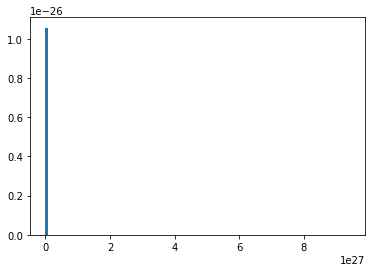

In [9]:
import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(s, 100, density=True, align='mid')

In [10]:
x = np.linspace(min(bins), max(bins), 10000)
pdf = (np.exp(-(np.log(x) - mu)**2 / (2 * sigma**2))
       / (x * sigma * np.sqrt(2 * np.pi)))

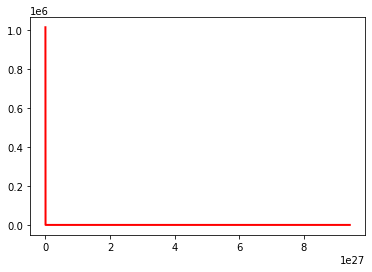

In [11]:
plt.plot(x, pdf, linewidth=2, color='r')
plt.axis('tight')
plt.show()

In [12]:
# Generate a thousand samples: each is the product of 100 random
# values, drawn from a normal distribution.
rng = rng
b = []
for i in range(1000):
   a = 10. + rng.standard_normal(100)
   b.append(np.product(a))

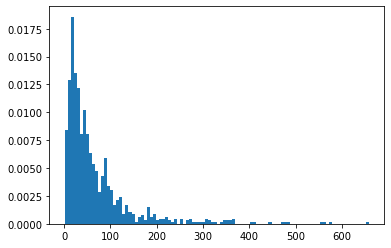

In [13]:
b = np.array(b) / np.min(b) # scale values to be positive
count, bins, ignored = plt.hist(b, 100, density=True, align='mid')
sigma = np.std(np.log(b))
mu = np.mean(np.log(b))

In [14]:
x = np.linspace(min(bins), max(bins), 10000)
pdf = (np.exp(-(np.log(x) - mu)**2 / (2 * sigma**2))
       / (x * sigma * np.sqrt(2 * np.pi)))

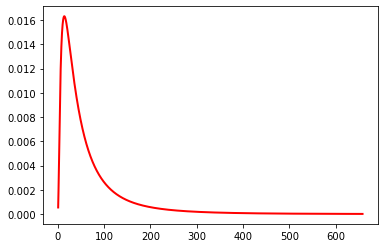

In [15]:
plt.plot(x, pdf, color='r', linewidth=2)
plt.show()

### Conclusion

![Image](https://qtxasset.com/cdn-cgi/image/w=850,h=478,f=auto,fit=crop,g=0.5x0.5/https://qtxasset.com/quartz/qcloud1/media/image/hotelmanagement/1546632060/Airbnb%20Logo.png/Airbnb%20Logo.png?VersionId=ThlQLEp0zFaHTe_93YSLwNNOHeweU0sd)